In [325]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
#import xgboost as xgb
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import kendalltau
from scipy.stats import spearmanr
from scipy.stats import pointbiserialr
import math

In [326]:
CO2entropy = 'entropy.csv'
entropy = pd.read_csv(CO2entropy)
entropy = entropy.iloc[:,1]
#print(entropy)

CO2year = 'CO2year.csv'
year = pd.read_csv(CO2year)

CO2_Comprehensive_Data = 'Climate Change Analysis/Datasets/Stage 1/Gas Concentration/co2_concentration.csv'
CO2csv = pd.read_csv(CO2_Comprehensive_Data)
CO2_x = year

In [369]:
Stage2data = 'Climate Change Analysis/Datasets/Stage 2/Air-Sea_Flux_to_Atlantic_Cyclone.csv'
cycloneData = pd.read_csv(Stage2data)
#print(cycloneData)
pdi = cycloneData.PDI

x = cycloneData.Year
features = ['Year', 'time']
X = cycloneData[features]
time = cycloneData.time

pdi_refined = 'pdi_refined.csv'
pdi_refined = pd.read_csv(pdi_refined)
pdi_refined = pdi_refined.iloc[:,1]
#print(pdi_refined)
pdiArray = pdi_refined.to_numpy()
newPDI = [18.20]
newpdi = np.concatenate((newPDI, pdiArray))

PI = 'PI.csv'
PI = pd.read_csv(PI)
PI = PI.iloc[:,1]

data2 = 'Climate Change Analysis/Datasets/Stage 2/Atlantic_Hurricane_Data.csv'
stormData = pd.read_csv(data2)
#print(stormData)
aceYear = stormData.Year

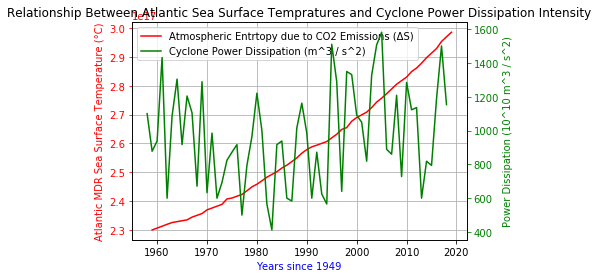

In [372]:
# Observation of Relation between CO2 entropy and PDI
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()


line1, = ax1.plot(CO2_x, entropy[:61], label="Atmospheric Entrtopy due to CO2 Emissions (ΔS)", color="r")
line2, = ax2.plot(aceYear[107:], PI[107:], label="Cyclone Power Dissipation (m^3 / s^2)", color="g")

curves = [line1, line2]

ax1.legend(curves, [curve.get_label() for curve in curves])

plt.title('Relationship Between Atlantic Sea Surface Tempratures and Cyclone Power Dissipation Intensity')
#plt.ylabel('Amount of Carbon Dioxide in ppm')
ax1.set_xlabel('Years since 1949', color='b')
ax1.set_ylabel('Atlantic MDR Sea Surface Temperature (°C)', color='r')
ax1.tick_params(axis='y', colors='r')
ax2.set_ylabel('Power Dissipation (10^10 m^3 / s^2)', color='g')
ax2.tick_params(axis='y', colors='g')
ax1.grid()
#plt.legend(['Average Temperature Variation', 'Carbon Emissions'])
plt.show()

In [329]:
import statistics
print(statistics.stdev(newpdi))

16.015482142332342


In [330]:
emission_model = GradientBoostingRegressor(random_state=1)
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

class regression:
        
    def predict(self, X, y, pred):
        emission_model.fit(X, y)
        #print(X.head())
        print("Predictions: ")
        print(emission_model.predict(pred))
        train_pred = emission_model.predict(pred)
    
        #print(high_price_model.predict(108.000, 3477599.0))
        training_predictions = pd.DataFrame({'predictions': train_pred})
        #firstPred = cycloneData.join(training_predictions)
        #print(cycloneData.join(training_predictions))
        print(training_predictions)

        #print("Prediction Error: ")
        #mean_absolute_error(y, train_pred)
        
    def validate(self, X, y, mln):
        train_x, val_x, train_y, val_y = train_test_split(X, y, random_state = 0)
        validation_model = RandomForestRegressor()
        validation_model.fit(train_x, train_y)
        mean_absolute_error(val_y, validation_model.predict(val_x))
        
        fitting_model = GradientBoostingRegressor(max_leaf_nodes = mln, random_state = 0)
        fitting_model.fit(train_x, train_y) 
        mae = mean_absolute_error(val_y, fitting_model.predict(val_x))
        return(str(mae))
    
class check_Least:
    def __init__(self):
        self.least = 111111111111111111111111111111111111111111111111111110
    def iteration(self, m): 
        for x in m:
            #for i in candidate_max_leaf_nodes:
                if(x <= self.least):
                    self.least = x
                else:
                    continue
        return(m.index(self.least))
    
model = regression()
checkFit = check_Least()

In [331]:
pdir = 'pdi_refined.csv'
pdir = pd.read_csv(pdir)
pdir = pdir.iloc[:,1]

flux = 'fluxPred.csv'
flux = pd.read_csv(flux)
#print(entropy)
flux = flux.iloc[:,1]

fluxyear = 'fluxYear.csv'
year = pd.read_csv(fluxyear)

flux = flux.to_numpy()
fluxr = list()
for i in flux:
    fluxr.append(i/1000)
    
force = 'forcePred.csv'
force = pd.read_csv(force)
force = force.iloc[:,1]

In [332]:

#print(entropy[:51].shape)
#print(pdir[9:].shape)
entropyArray = entropy[:51].to_numpy()


'''pdir = list()
for x in pdi:
    pdir.append(pdi/(10**10))
'''
entropyArray1 = entropy[:61].to_numpy()

timeArray = time[19:].to_numpy()
timeArray1 = time[9:].to_numpy()
#print(entropyArray.shape)
#print(timeArray.shape)

#print(force[:51].shape)
#print(entropyArray.shape)
d = {'entropy': entropyArray, 'col2': timeArray}
#, 'flux': fluxr[:51]
#print(entropyArray1.shape)
#print(force.shape)
df = pd.DataFrame(data=d)
p = {'entropy': entropyArray1, 'col2': timeArray1}
pf = pd.DataFrame(data=p)
features = ['entropy', 'col2']
X1 = df[features]
X2 = pf[features]
#print(len(pdir))
print(X1.shape)
#pdiArray = pdir[19:].to_numpy()
model.predict(X1, PI[107:], X2)

mae_array = list()
mae = list()
for mln in [5, 25, 50, 75, 100, 150, 300, 500, 1000, 5000]:
    print("Max Leaf Nodes: " + str(mln))
    mae_array.append(model.validate(X1, PI[9:], mln))
    #print(mae_array)
    for i in mae_array:
        mae.append(float(i))

(51, 2)
Predictions: 
[16.29040122 20.41384438 32.44790906 18.11021413 23.28008346 27.40406686
 24.01442831 25.22442831 24.60442831 23.23165359 28.60773203 25.21886344
 31.15905201 18.57807121 23.06803837 28.71649557 21.71676625 22.45446099
 17.88402003 15.03133664 24.11676641 21.30530292 21.21269269 15.7493206
 16.0139206  18.40165015 18.96000108 17.41432279 17.00230698 22.82902797
 24.98569094 21.82960772 17.22688254 16.09296711 12.83817061 15.65109139
 30.36306411 27.26033187 21.5450219  32.59576359 33.25125906 25.36974541
 23.27193479 17.73536586 28.14941076 33.14587741 54.12055181 30.7289736
 22.97483223 37.44756647 31.54729871 27.19008771 27.19008771 26.34780796
 33.1301504  35.51109339 35.86086524 20.50110746 21.93039848 23.22796728
 14.80740516]
    predictions
0     16.290401
1     20.413844
2     32.447909
3     18.110214
4     23.280083
5     27.404067
6     24.014428
7     25.224428
8     24.604428
9     23.231654
10    28.607732
11    25.218863
12    31.159052
13    18.578

C:\Users\surya_5mk2dxf\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\surya_5mk2dxf\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\surya_5mk2dxf\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\surya_5mk2dxf\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



Max Leaf Nodes: 100
Max Leaf Nodes: 150
Max Leaf Nodes: 300


C:\Users\surya_5mk2dxf\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\surya_5mk2dxf\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\surya_5mk2dxf\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\surya_5mk2dxf\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Max Leaf Nodes: 500
Max Leaf Nodes: 1000
Max Leaf Nodes: 5000


C:\Users\surya_5mk2dxf\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\surya_5mk2dxf\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [364]:
m = list()
m = mae
#print(m)

candidate_leaf_nodes = [5, 25, 50, 75, 100, 150, 300, 500, 1000, 5000]
#print(checkFit.iteration(m))
index = checkFit.iteration(m)
best_tree_size = candidate_leaf_nodes[index]
#print(" ")
#print("Max Leaf Node Size: " + str(best_tree_size))

final_model = GradientBoostingRegressor(max_leaf_nodes = 5000, random_state = 0)
final_model.fit(X1, pdir[9:])

#print(final_model.predict(X2))
valid_pred = final_model.predict(X2)

valid = list()
for i in valid_pred:
    valid.append((i*(1.5))*(10**10))
    
print(valid)
pd.DataFrame(valid).to_csv("./postIndustrial.csv")

entropyConstant = 'entropyConstant.csv'
entropyConstant = pd.read_csv(entropyConstant)
#entropyConstant = entropyConstant.iloc[:,1]
#print(timeArray1.shape)
entropyConst = entropyConstant.to_numpy()
entropyC = list()
for i in entropyConstant:
    entropyC.append(i)

ent = [2.300000e+17] * len(timeArray1)
#print(ent)
c = {'entropy': ent, 'col2': timeArray1}
cf = pd.DataFrame(data=c)
feature = ['entropy', 'col2']
X3 = cf[feature]
#print(X3)

print(final_model.predict(X3))
constant_pred = final_model.predict(X3)

const = list()
for i in constant_pred:
    const.append(i)

con = list()
const = [15.96533214666732, 15.96533214666732, 15.96533214666732, 15.96533214666732, 15.96533214666732, 15.96533214666732, 15.96533214666732, 15.96533214666732, 15.96533214666732, 15.96533214666732, 15.96533214666732, 16.990465197666424, 27.008404433091535, 19.295181042209283, 25.582360099626115, 29.77051508142851, 25.102659163918112, 19.203564234209132, 27.213985111517754, 19.39531936209561, 25.134429396354342, 18.5674776171768, 21.178625545732316, 27.24441671269809, 17.24441671269809, 18.57921748828103, 18.641493997652184, 18.94195412625635, 19.305356960114963, 20.312450397752812, 25.99730374009318, 25.59366634874778, 25.24568736124563, 19.66640254690197, 19.770199526120711, 19.67414497547039, 21.047378060031974, 16.93294102616308, 16.73720265268313, 19.190689950070848, 20.20321477708115, 19.17518452262984, 17.49973405832651, 18.863955506731315, 16.93629045487006, 16.288823024823387, 25.95256753879165, 27.043053195570344, 18.812307776209416, 18.30903303428533, 25.81668683600642, 26.19012841042615, 25.48146122900818, 16.00578875963469, 16.32591192778306, 17.85091345860064, 17.12681368377953, 18.57944031238397, 18.66705390661883, 19.893864601989684, 19.47536363044435]
for i in const:
    con.append(i * (10**10))
    
print(con)
pd.DataFrame(con).to_csv("./preIndustrial.csv")

[239479982200.0098, 297743586799.6639, 508102458222.4834, 281531767854.58954, 336756189080.68884, 389756723779.93164, 361268817205.2266, 386733000226.30444, 377387121870.51196, 304620533145.1198, 393802407361.67975, 309882048203.2487, 489328050375.08856, 162307012397.36407, 300864078483.3447, 393533643363.2992, 249416722808.15802, 304615434057.452, 210878593438.67584, 201506379228.37933, 326133485587.2925, 300447923541.27985, 290067991482.0119, 195931810962.00305, 177633079539.75992, 198912641317.2599, 210715705443.26498, 185472729638.22455, 167200030771.50076, 351430546656.4803, 416726559594.2198, 376735965091.35736, 245176451668.8943, 238663314968.50134, 209631501149.3905, 235267262780.019, 416017075050.94086, 384440324616.3391, 129025926556.22371, 430941750888.27435, 445614692757.11383, 287230783174.71045, 255438346853.4742, 304732102624.1826, 309716533599.49347, 345234686100.00494, 633215568411.7527, 378617441967.69366, 301680032746.9741, 544127474416.5606, 451288580924.7717, 35897

C:\Users\surya_5mk2dxf\Anaconda3\lib\site-packages\matplotlib\legend.py:449: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000016990855400> has a label of '_line2' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


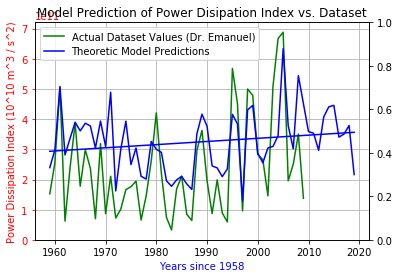

In [365]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
reg1 = LinearRegression().fit(CO2_x, valid)
y_pred = reg1.predict(CO2_x)
reg1.score(CO2_x, valid)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()


line1, = ax1.plot(x[10:], pdi[10:], label="Actual Dataset Values (Dr. Emanuel)", color="g")
line2, = ax1.plot(CO2_x, valid, label="Theoretic Model Predictions", color="b")
line3, = ax1.plot(CO2_x, y_pred, color="b")

curves = [line1, line2, line3]

ax1.legend(curves, [curve.get_label() for curve in curves])

plt.title('Model Prediction of Power Disipation Index vs. Dataset')
#plt.ylabel('Amount of Carbon Dioxide in ppm')
ax1.set_xlabel('Years since 1958', color='b')
ax1.set_ylabel('Power Dissipation Index (10^10 m^3 / s^2)', color='r')
ax1.tick_params(axis='y', colors='r')
#ax2.set_ylabel('Power Dissipation (10^10 m^3 / s^2)', color='g')
#ax2.tick_params(axis='y', colors='g')
ax1.grid()
#plt.legend(['Average Temperature Variation', 'Carbon Emissions'])
plt.show()

C:\Users\surya_5mk2dxf\Anaconda3\lib\site-packages\matplotlib\legend.py:449: UserWarning: The handle <matplotlib.lines.Line2D object at 0x000001699090F320> has a label of '_line1' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))
C:\Users\surya_5mk2dxf\Anaconda3\lib\site-packages\matplotlib\legend.py:449: UserWarning: The handle <matplotlib.lines.Line2D object at 0x000001699090F7B8> has a label of '_line3' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


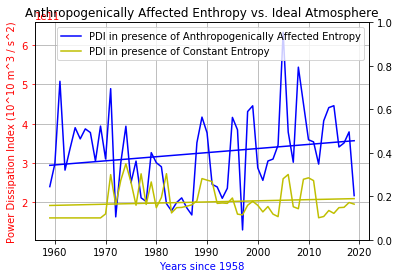

In [366]:
reg2 = LinearRegression().fit(CO2_x, con)
y_pred2 = reg2.predict(CO2_x)
reg2.score(CO2_x, con)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

#line1, = ax1.plot(x[10:], pdi[10:], label="Actual Dataset Values (Dr. Emanuel)", color="g")
line2, = ax1.plot(CO2_x, valid, label="PDI in presence of Anthropogenically Affected Entropy", color="b")
line3, = ax1.plot(CO2_x, y_pred, color="b")
line4, = ax1.plot(CO2_x, con, label="PDI in presence of Constant Entropy", color="y")
line5, = ax1.plot(CO2_x, y_pred2, color="y")

curves = [line2, line3, line4, line5]

ax1.legend(curves, [curve.get_label() for curve in curves])

plt.title('Anthropogenically Affected Enthropy vs. Ideal Atmosphere')
#plt.ylabel('Amount of Carbon Dioxide in ppm')
ax1.set_xlabel('Years since 1958', color='b')
ax1.set_ylabel('Power Dissipation Index (10^10 m^3 / s^2)', color='r')
ax1.tick_params(axis='y', colors='r')
#ax2.set_ylabel('Power Dissipation (10^10 m^3 / s^2)', color='g')
#ax2.tick_params(axis='y', colors='g')
ax1.grid()
#plt.legend(['Average Temperature Variation', 'Carbon Emissions'])
plt.show()

In [296]:
#chisq = (actual - theoretical)^2/theoretical
chisq = list()
for u in range(len(pdir[9:])):
    chisq.append((((pdir[u]/10)-(valid_pred[u]/10)**2)/(valid_pred[u]/10)))

print(chisq)
print(sum(chisq))
print(len(pdir[9:]))

#critical chi-square value: 61.75


[1.6642986229959496, -1.0273785615143025, -2.1975028227192697, -0.8374543848953049, -1.2082994387282395, -0.6827203368161291, -1.7830048817637094, -1.3740665522687734, -1.0935977987281547, -0.3262831764152049, -0.5911154420944034, 1.4635809390276708, -2.067076486379759, 2.352665359896752, 0.9073939675126784, -0.708052830111148, 0.4940368403421709, 0.08062026043219028, -0.854862995691166, 1.2804054109962866, -2.197172865500791, -0.866889837934568, -1.7888092633898418, -1.223022699951673, -0.8603331454679841, -1.3045415931871431, -1.2950528533542813, -1.583045103489516, -1.0896980639621683, -1.0986533828937866, -1.0989949037189153, -2.3084545623538757, -1.6092498939158126, -1.068872390694882, 0.56640847618057, 0.2329969714230244, -2.7134263633986615, -2.3612211245029364, 0.4141873909605964, -0.6129644602197118, -1.515563037966775, -1.5238789654964722, -0.710820674583803, -0.8732769574930729, -2.129733661047432, -0.6031498375509667, -3.4935234977010596, -1.8811531853784433, 0.064422201630

C:\Users\surya_5mk2dxf\Anaconda3\lib\site-packages\matplotlib\legend.py:449: UserWarning: The handle <matplotlib.lines.Line2D object at 0x000001698D94CC18> has a label of '_line1' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


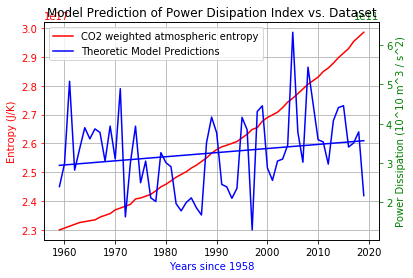

In [359]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()


line1, = ax1.plot(CO2_x, entropy[:61], label="CO2 weighted atmospheric entropy", color="r")
#line2, = ax2.plot(x[9:], pdi[9:], label="Cyclone Power Dissipation (m^3 / s^2)", color="g")
line3, = ax2.plot(CO2_x, valid, label="Theoretic Model Predictions", color="b")
line4, = ax2.plot(CO2_x, y_pred, color="b")
#line4, = ax2.plot(CO2_x, constant_pred, label="Theoretic Model Predictions", color="b")

curves = [line1, line3, line4]

ax1.legend(curves, [curve.get_label() for curve in curves])

plt.title('Model Prediction of Power Disipation Index vs. Dataset')
#plt.ylabel('Amount of Carbon Dioxide in ppm')
ax1.set_xlabel('Years since 1958', color='b')
ax1.set_ylabel('Entropy (J/K)', color='r')
ax1.tick_params(axis='y', colors='r')
ax2.set_ylabel('Power Dissipation (10^10 m^3 / s^2)', color='g')
ax2.tick_params(axis='y', colors='g')
ax1.grid()
#plt.legend(['Average Temperature Variation', 'Carbon Emissions'])
plt.show()

In [315]:
Cumulative_GHG_Data = 'Climate Change Analysis/Datasets/Individual Datasets/Necessary Aerosol Datasets/GHG_atmospheric_concentration.csv'
GHGcsv = pd.read_csv(Cumulative_GHG_Data)
#print(GHGcsv)
year = GHGcsv.Year
time = GHGcsv.time
co2 = GHGcsv.CO2_EEA
co2Pre = co2[:20]
co2Post = co2[35:85]
timePre = time[:20]
timePost = time[35:85]

co2Gram = list()
for i in co2:
    gt = i * 2.31
    g = gt * (math.pow(10, 15))
    co2Gram.append("{:.2e}".format(g))

co2mol = list()
for o in co2Gram:
    co2mol.append(float(o)/44.01)
    
entropy = (28.2 * math.log((293 - (0.0065 * 11000)) / 293)) + (8.314 * math.log(101.29/7.57))

#print(len(co2entropy))

co2entropyFinal = list()
for x in range(len(co2mol)):
    co2entropyFinal.append(co2mol[x] * entropy)

co2entPre = co2entropyFinal[:20]
co2entPost = co2entropyFinal[35:85]
#print(co2mol)

p = {'entropy': co2entPre, 'col2': timePre}
pf = pd.DataFrame(data=p)
features = ['entropy', 'col2']
X4 = pf[features]

pre = final_model.predict(X4)
pre2 = list()
for i in pre:
    pre2.append(i - 10)
    
pre3 = [7.021104377437151, 7.021104377437151, 7.021104377437151, 7.021104377437151, 7.421784082907532, 8.06029040143806, 7.370487618978807, 8.296265527784502, 10.09341881903957, 12.654743770378985, 9.042275980383597, 7.58405114754131, 8.11198337402736, 10.83798593266358, 13.409814089295494, 12.409814089295494, 15.409814089295494, 10.409814089295494, 9.409814089295494, 16.409814089295494]

l = {'entropy': co2entPost, 'col2': timePost}
lf = pd.DataFrame(data=l)
features = ['entropy', 'col2']
X5 = lf[features]

post = final_model.predict(X5)
newPost = list()
for y in post:
    newPost.append(y * 1.5)
print(pre3)
print(newPost)
print(len(post))
print(len(co2entPost))

[7.021104377437151, 7.021104377437151, 7.021104377437151, 7.021104377437151, 7.421784082907532, 8.06029040143806, 7.370487618978807, 8.296265527784502, 10.09341881903957, 12.654743770378985, 9.042275980383597, 7.58405114754131, 8.11198337402736, 10.83798593266358, 13.409814089295494, 12.409814089295494, 15.409814089295494, 10.409814089295494, 9.409814089295494, 16.409814089295494]
[60.61472113394324, 60.61472113394324, 60.61472113394324, 60.61472113394324, 60.61472113394324, 60.61472113394324, 60.61472113394324, 60.61472113394324, 60.61472113394324, 60.09895632221259, 55.11253884547305, 54.29226912665331, 54.29226912665331, 53.526499179093506, 53.526499179093506, 55.64212291157357, 55.64212291157357, 53.193263830805314, 50.72834596319923, 50.72834596319923, 55.1190495595248, 55.1190495595248, 55.1190495595248, 55.1190495595248, 57.82449339621574, 57.82449339621574, 59.17314411262765, 59.17314411262765, 50.55346726410525, 46.457876376365164, 46.457876376365164, 57.26355855900889, 54.502

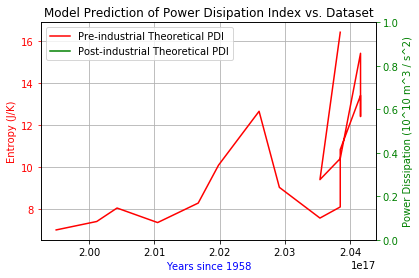

In [318]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()


line1, = ax1.plot(co2entPre, pre3, label="Pre-industrial Theoretical PDI", color="r")
#line2, = ax1.plot(co2entPost, newPost, label="Post-industrial Theoretical PDI", color="g")

curves = [line1, line2]

ax1.legend(curves, [curve.get_label() for curve in curves])

plt.title('Model Prediction of Power Disipation Index vs. Dataset')
#plt.ylabel('Amount of Carbon Dioxide in ppm')
ax1.set_xlabel('Years since 1958', color='b')
ax1.set_ylabel('Entropy (J/K)', color='r')
ax1.tick_params(axis='y', colors='r')
ax2.set_ylabel('Power Dissipation (10^10 m^3 / s^2)', color='g')
ax2.tick_params(axis='y', colors='g')
ax1.grid()
#plt.legend(['Average Temperature Variation', 'Carbon Emissions'])
plt.show()

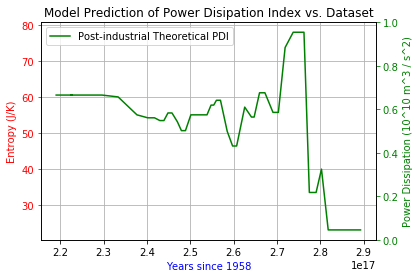

In [319]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()


#line1, = ax1.plot(co2entPre, pre3, label="Pre-industrial Theoretical PDI", color="r")
line2, = ax1.plot(co2entPost, newPost, label="Post-industrial Theoretical PDI", color="g")

curves = [line2]

ax1.legend(curves, [curve.get_label() for curve in curves])

plt.title('Model Prediction of Power Disipation Index vs. Dataset')
#plt.ylabel('Amount of Carbon Dioxide in ppm')
ax1.set_xlabel('Years since 1958', color='b')
ax1.set_ylabel('Entropy (J/K)', color='r')
ax1.tick_params(axis='y', colors='r')
ax2.set_ylabel('Power Dissipation (10^10 m^3 / s^2)', color='g')
ax2.tick_params(axis='y', colors='g')
ax1.grid()
#plt.legend(['Average Temperature Variation', 'Carbon Emissions'])
plt.show()

# --------------------------------------------------------------------------------------------------

In [271]:
vMax = 'vMax.csv'
vMax = pd.read_csv(vMax)
vMax = vMax.iloc[:,1]

In [ ]:
# Observation of Relation between CO2 entropy and PDI
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()


line1, = ax1.plot(CO2_x, vMax[107:], label="Potential Intensity (km/h)", color="r")
line2, = ax2.plot(x[9:], pdi[9:], label="Cyclone Power Dissipation (m^3 / s^2)", color="g")

curves = [line1, line2]

ax1.legend(curves, [curve.get_label() for curve in curves])

plt.title('Relationship Between Potential Intensit and Cyclone Power Dissipation Intensity')
#plt.ylabel('Amount of Carbon Dioxide in ppm')
ax1.set_xlabel('Years since 1949', color='b')
ax1.set_ylabel('Atlantic MDR Sea Surface Temperature (°C)', color='r')
ax1.tick_params(axis='y', colors='r')
ax2.set_ylabel('Power Dissipation (10^10 m^3 / s^2)', color='g')
ax2.tick_params(axis='y', colors='g')
ax1.grid()
#plt.legend(['Average Temperature Variation', 'Carbon Emissions'])
plt.show()

In [109]:
((entropy[61]-entropy[0])/entropy[0])/61

0.005037011198206215

In [110]:
(entropy[61]-entropy[0])/61

1158772152478425.2

In [112]:
((valid_pred[60]-valid_pred[0])/valid_pred[0])/60

-0.001567109438971911

In [113]:
(valid_pred[60]-valid_pred[0])/60

-0.026673933331607873